## Plot distance vs. boulder diameter for Geophone Rock and Geophone 4 Rock 1 events

### Import libraries

In [1]:
import pickle
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import os
import math
import datetime
from matplotlib import gridspec

# Import functions
import sys
fxndir = '../functions/'
sys.path.insert(0,fxndir)
from moon2data import *

### Load boulder coordinates and sizes

In [2]:
mqdir1 = '../catalogs/coordinates/'
boulder_cat = pd.read_csv(mqdir1 + 'Apollo17_boulder_coordinates.csv')

# Geophone Rock
row_georock = boulder_cat.loc[boulder_cat.name == 'Geophone rock'].iloc[0]
diameter_georock = row_georock.diameter_m

# Geophone 4 Rock 1
row_rock1 = boulder_cat.loc[boulder_cat.name == 'GEO 4 rock 1'].iloc[0]
diameter_rock1 = row_rock1.diameter_m

### Load catalogs of boulder events

In [3]:
mqdir2 = '../catalogs/final_catalogs/LM_vs_boulder_vs_other/'

# Geophone Rock
cat_georock = pd.read_csv(mqdir2 + 'GeophoneRock_events_catalog_HQ_final.csv')
evid_georock = '761227-01-M1'
rows_georock = cat_georock.loc[cat_georock.evid == evid_georock]

# Geophone 4 Rock 1
cat_rock1 = pd.read_csv(mqdir2 + 'GEO4Rock1_events_catalog_HQ_final.csv')
evid_rock1 = '770206-17-M2'
rows_rock1 = cat_rock1.loc[cat_rock1.evid == evid_rock1]

### Inputs to obtain waveforms

In [4]:
parentdir = '/data/ytamama/Apollo17/LSPE_data/sac_volts_ds/'
minfreq = 3
maxfreq = 35
befwin = 5
aftwin = 25

### Obtain waveforms and source-receiver distance at each geophone

#### Geophone Rock

In [5]:
row_georock = rows_georock.loc[rows_georock.geophone == 3].iloc[0]
arrtime_georock = datetime.strptime(row_georock.picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Geophone 1
st1 = moon2sac(arrtime_georock,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_georock = st1.traces[0].times() - befwin
trdata1_georock = st1.traces[0].data
row1 = rows_georock.loc[rows_georock.geophone == 1].iloc[0]
dist1_georock = row1.source_distance_m

# Geophone 2
st2 = moon2sac(arrtime_georock,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_georock = st2.traces[0].times() - befwin
trdata2_georock = st2.traces[0].data
row2 = rows_georock.loc[rows_georock.geophone == 2].iloc[0]
dist2_georock = row2.source_distance_m

# Geophone 3
st3 = moon2sac(arrtime_georock,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_georock = st3.traces[0].times() - befwin
trdata3_georock = st3.traces[0].data
dist3_georock = row_georock.source_distance_m

# Geophone 4
st4 = moon2sac(arrtime_georock,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_georock = st4.traces[0].times() - befwin
trdata4_georock = st4.traces[0].data
row4 = rows_georock.loc[rows_georock.geophone == 4].iloc[0]
dist4_georock = row4.source_distance_m

#### Geophone 4 Rock 1

In [6]:
row_rock1 = rows_rock1.loc[rows_rock1.geophone == 4].iloc[0]
arrtime_rock1 = datetime.strptime(row_rock1.picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Geophone 1
st1 = moon2sac(arrtime_rock1,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_rock1 = st1.traces[0].times() - befwin
trdata1_rock1 = st1.traces[0].data
row1 = rows_rock1.loc[rows_rock1.geophone == 1].iloc[0]
dist1_rock1 = row1.source_distance_m

# Geophone 2
st2 = moon2sac(arrtime_rock1,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_rock1 = st2.traces[0].times() - befwin
trdata2_rock1 = st2.traces[0].data
row2 = rows_rock1.loc[rows_rock1.geophone == 2].iloc[0]
dist2_rock1 = row2.source_distance_m

# Geophone 3
st3 = moon2sac(arrtime_rock1,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_rock1 = st3.traces[0].times() - befwin
trdata3_rock1 = st3.traces[0].data
row3 = rows_rock1.loc[rows_rock1.geophone == 3].iloc[0]
dist3_rock1 = row3.source_distance_m

# Geophone 4
st4 = moon2sac(arrtime_rock1,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_rock1 = st4.traces[0].times() - befwin
trdata4_rock1 = st4.traces[0].data
dist4_rock1 = row_rock1.source_distance_m

### Normalize waveforms

In [7]:
# Geophone Rock
trdata1_norm_georock = (trdata1_georock / np.max(np.abs(trdata1_georock)))*2
trdata2_norm_georock = (trdata2_georock / np.max(np.abs(trdata1_georock)))*2
trdata3_norm_georock = (trdata3_georock / np.max(np.abs(trdata1_georock)))*2
trdata4_norm_georock = (trdata4_georock / np.max(np.abs(trdata1_georock)))*2

# Rock 1
trdata1_norm_rock1 = (trdata1_rock1 / np.max(np.abs(trdata1_georock)))*2
trdata2_norm_rock1 = (trdata2_rock1 / np.max(np.abs(trdata1_georock)))*2
trdata3_norm_rock1 = (trdata3_rock1 / np.max(np.abs(trdata1_georock)))*2
trdata4_norm_rock1 = (trdata4_rock1 / np.max(np.abs(trdata1_georock)))*2

### Plot record section of waveforms vs. distance AND max. stress vs. boulder diameter

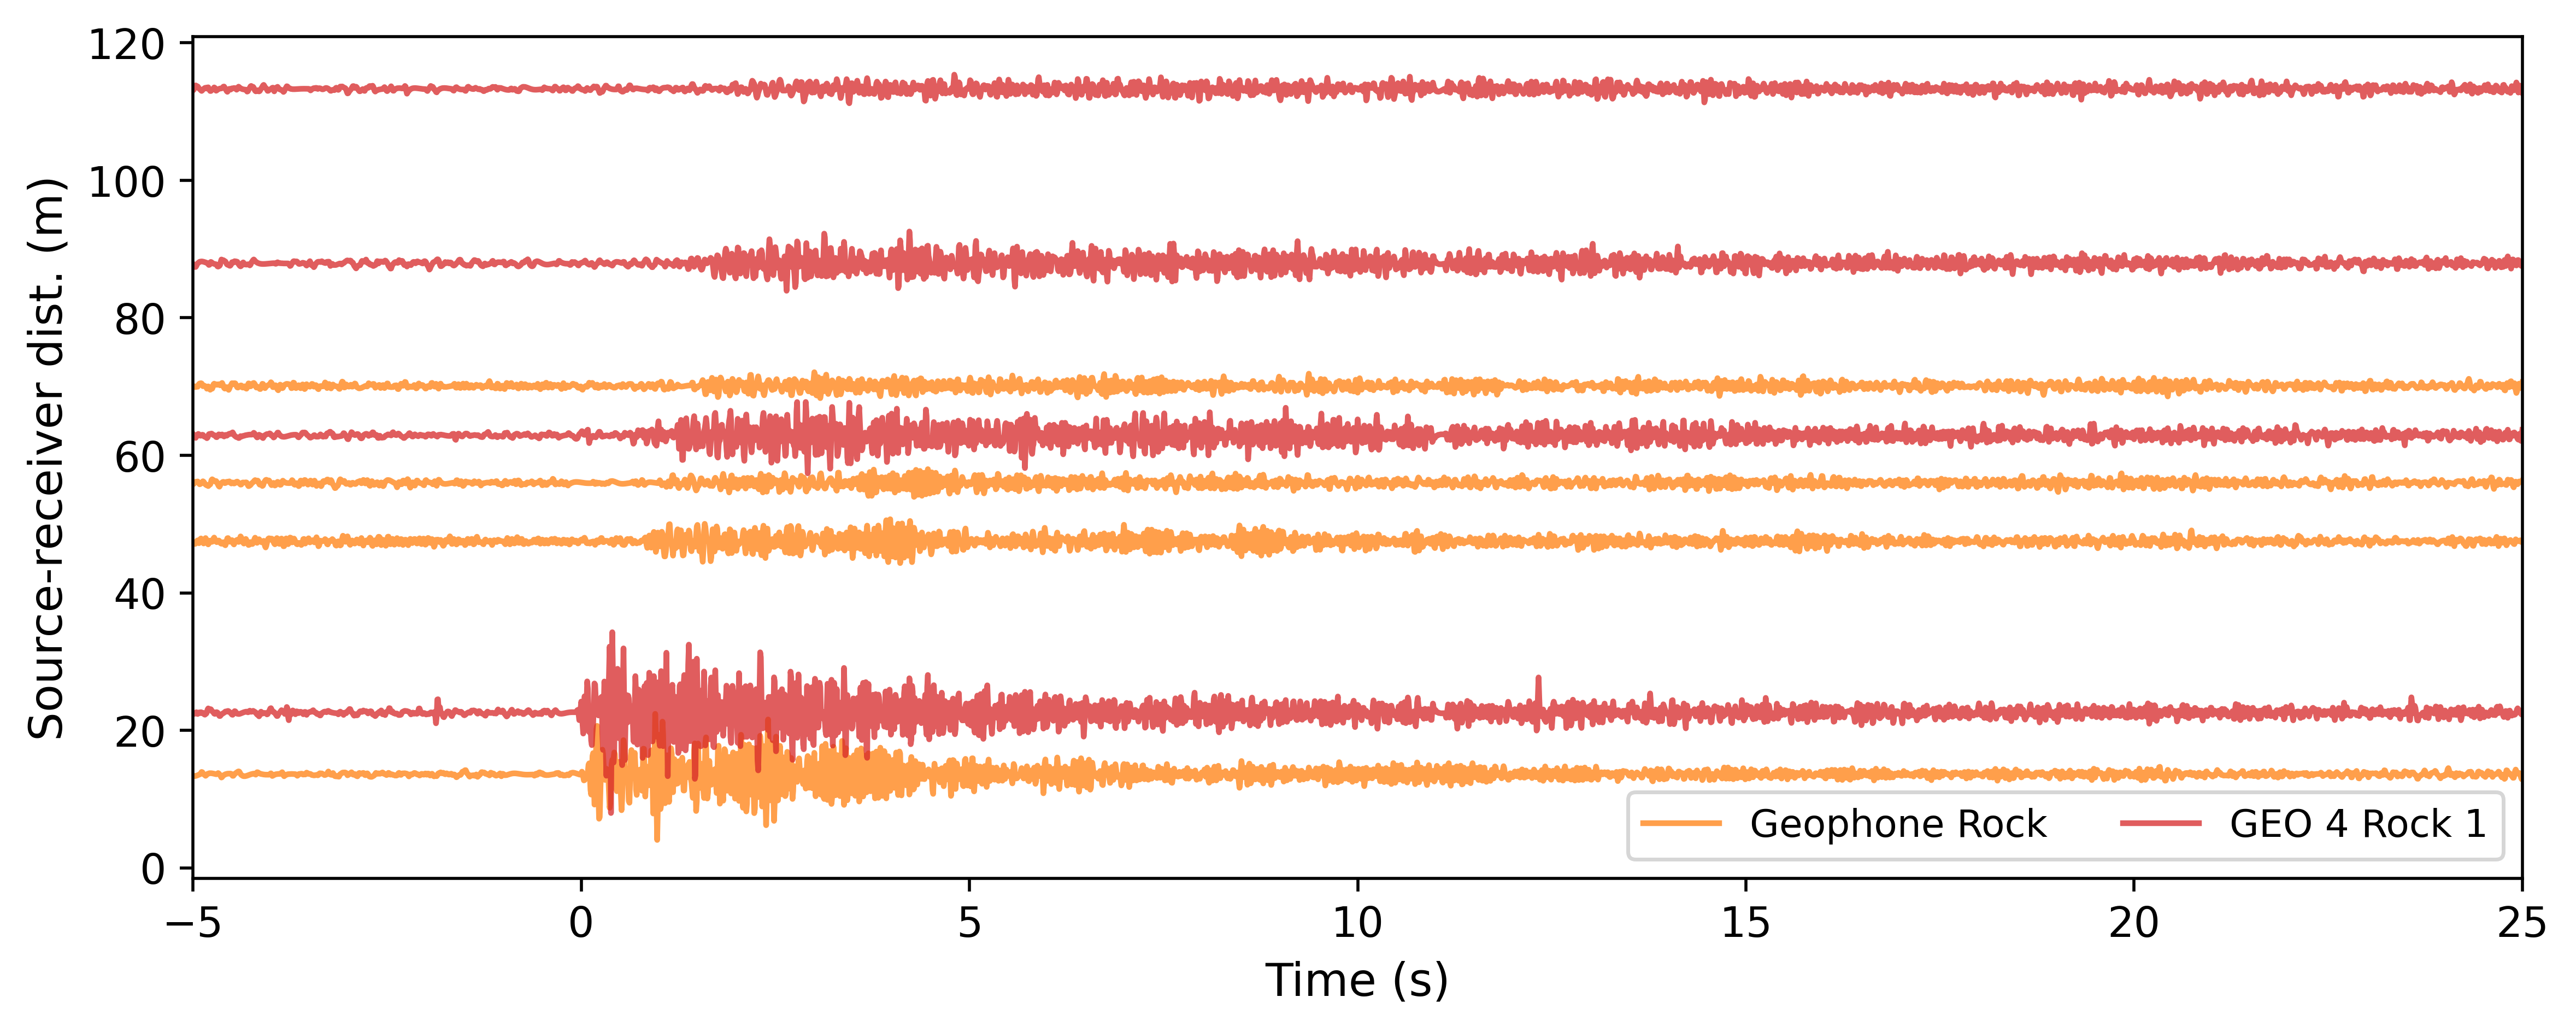

In [8]:
fig,ax1 = plt.subplots(1,1,figsize=(11, 4), dpi=500)

# Geophone Rock
ax1.plot(trtimes1_georock,trdata1_norm_georock+dist1_georock,color='C1',alpha=0.75,label='Geophone Rock')
ax1.plot(trtimes2_georock,trdata2_norm_georock+dist2_georock,color='C1',alpha=0.75)
ax1.plot(trtimes3_georock,trdata3_norm_georock+dist3_georock,color='C1',alpha=0.75)
ax1.plot(trtimes4_georock,trdata4_norm_georock+dist4_georock,color='C1',alpha=0.75)
# Geophone 4 Rock 1
ax1.plot(trtimes1_rock1,trdata1_norm_rock1+dist1_rock1,color='C3',alpha=0.75,label='GEO 4 Rock 1')
ax1.plot(trtimes2_rock1,trdata2_norm_rock1+dist2_rock1,color='C3',alpha=0.75)
ax1.plot(trtimes3_rock1,trdata3_norm_rock1+dist3_rock1,color='C3',alpha=0.75)
ax1.plot(trtimes4_rock1,trdata4_norm_rock1+dist4_rock1,color='C3',alpha=0.75)
ax1.legend(loc='lower right',ncol=2)
ax1.set_xlim([-1*befwin,aftwin])
ax1.set_xlabel('Time (s)',fontsize=12)
ax1.set_ylabel('Source-receiver dist. (m)',fontsize=12)
ax1.tick_params(axis='both',labelsize=11.)